In [1]:
import matplotlib.pyplot as plt
import numpy as np
!pip3 install matplotlib numpy PyQt5


Saving frame 0 of 50
Saving frame 1 of 50
Saving frame 2 of 50
Saving frame 3 of 50
Saving frame 4 of 50
Saving frame 5 of 50
Saving frame 6 of 50
Saving frame 7 of 50
Saving frame 8 of 50
Saving frame 9 of 50
Saving frame 10 of 50
Saving frame 11 of 50
Saving frame 12 of 50
Saving frame 13 of 50
Saving frame 14 of 50
Saving frame 15 of 50
Saving frame 16 of 50
Saving frame 17 of 50
Saving frame 18 of 50
Saving frame 19 of 50
Saving frame 20 of 50
Saving frame 21 of 50
Saving frame 22 of 50
Saving frame 23 of 50
Saving frame 24 of 50
Saving frame 25 of 50
Saving frame 26 of 50
Saving frame 27 of 50
Saving frame 28 of 50
Saving frame 29 of 50
Saving frame 30 of 50
Saving frame 31 of 50
Saving frame 32 of 50
Saving frame 33 of 50
Saving frame 34 of 50
Saving frame 35 of 50
Saving frame 36 of 50
Saving frame 37 of 50
Saving frame 38 of 50
Saving frame 39 of 50
Saving frame 40 of 50
Saving frame 41 of 50
Saving frame 42 of 50
Saving frame 43 of 50
Saving frame 44 of 50
Saving frame 45 of 5

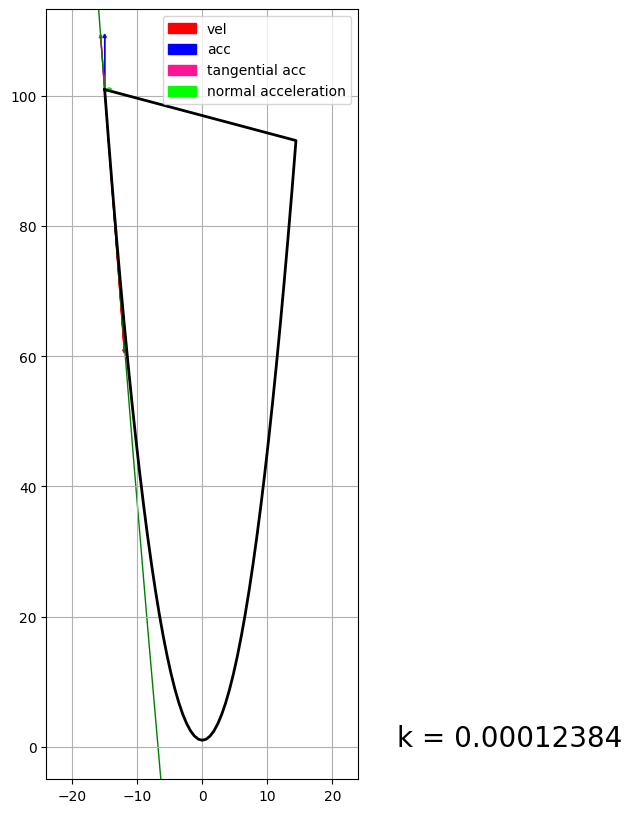

In [7]:
from dataclasses import dataclass
from typing import List
from matplotlib.animation import FuncAnimation

FPS = 5  # increase to make animation slower
t_start = -5.0
t_end = 5.0
frames = int((t_end - t_start) * FPS)


def fx(t):
    return t * 3


def fy(t):
    return t * t * 4 + 1


# function computes current sim time by frame number
def t(i):
    return t_start + i / FPS


# class take core of storing data points we computed in animation
@dataclass
class TracePoint:
    x: float
    y: float
    t: float

    vel: np.array
    acc: np.array

    @property
    def accn(self):
        # nothing special, just normal acceleration as difference
        return self.acc - self.acct

    @property
    def acct(self):
        # tangential acceleration is aligned with velocity vector
        acct = np.dot(self.acc, self.vel / np.linalg.norm(self.vel))
        return acct * self.vel / np.linalg.norm(self.vel)

    @property
    def k(self):
        # in original formula there are derivatives,
        # but in our sense they are just acceleration and veloctiy
        return np.linalg.norm(self.acc) / (np.sqrt(1 + self.vel.dot(self.vel))) ** 3

    @property
    def osculating_center(self):
        # i'm not a genius in math, but i think this is correct
        # http://mathonline.wikidot.com/the-osculating-circle-at-a-point-on-a-curve
        radius = 1 / self.k
        # find center of osculating center
        tan = self.vel / np.linalg.norm(self.vel)  # tangent
        b = np.cross(self.vel, self.acc)  # binormal
        n = np.cross(b, tan)  # normal
        n = n / np.linalg.norm(n)
        return np.array([self.x, self.y, 0]) + radius * n


# nothing will be interesting later, just initalization of plot

trace: List[TracePoint] = []

fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(-24, 24), ylim=(-5, 4 / 9 * 15 * 17))
ax.set_aspect("equal")
ax.grid()


line = ax.plot([], [], color="k", lw=2)[0]
# display velocity vector
vel = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="r", label="vel")
acc = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="b", label="acc")
acct = ax.arrow(
    0,
    0,
    0,
    0,
    head_width=0.5,
    head_length=0.5,
    color="deeppink",
    label="tangential acc",
)
accn = ax.arrow(
    0,
    0,
    0,
    0,
    head_width=0.5,
    head_length=0.5,
    color="lime",
    label="normal acceleration",
)

ktext = ax.text(30, 0, "", color="k", fontsize=20)

osculatingCircle = plt.Circle((0, 0), 5, color="g", fill=False)
ax.add_patch(osculatingCircle)
ax.legend()


def animate(i):
    ti = t(i)
    trace.append(
        TracePoint(
            x=fx(ti),
            y=fy(ti),
            t=ti,
            vel=np.array([3, 8 * ti, 0]),
            acc=np.array([0, 8, 0]),
        )
    )

    last = trace[-1]
    line.set_xdata([p.x for p in trace])
    line.set_ydata([p.y for p in trace])

    vel.set_data(x=last.x, dx=last.vel[0], y=last.y, dy=last.vel[1])
    acc.set_data(x=last.x, dx=last.acc[0], y=last.y, dy=last.acc[1])
    acct.set_data(x=last.x, dx=last.acct[0], y=last.y, dy=last.acct[1])
    accn.set_data(x=last.x, dx=last.accn[0], y=last.y, dy=last.accn[1])

    osculatingCircle.set_radius(1 / last.k)
    osculatingCircle.set_center(last.osculating_center)

    ktext.set_text(f"k = {last.k:.8f}")


anim = FuncAnimation(fig, animate, interval=1, frames=frames)
anim.save("motion_task1.gif")
plt.draw()
plt.show()


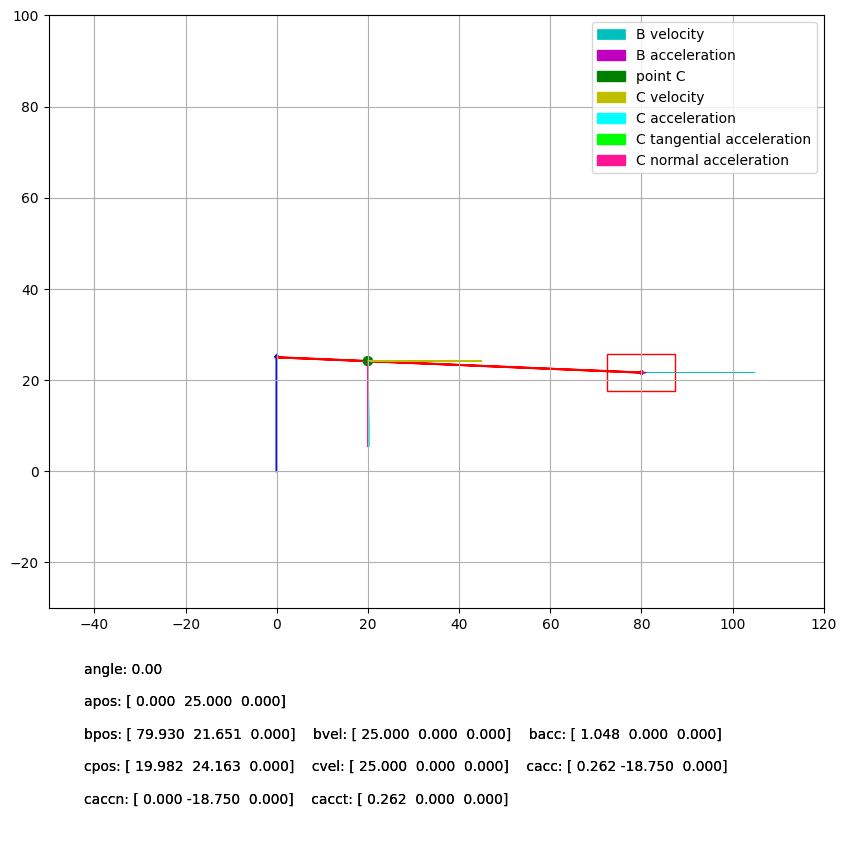

In [3]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

FPS = 60 # increase to make animation slower
phi_start = 0.0
phi_end = 2 * np.pi
frames = int((phi_end - phi_start) * FPS)


def phi(i):
    return phi_start + i / FPS


OA = 25
OP = 25
AB = 80
AC = 20
x = np.pi / 3
w = 1


@dataclass
class SystemTrace:
    phi: float

    @property
    def apos(self):
        return np.array(
            [
                OA * np.sin(self.phi),
                OA * np.cos(self.phi),
                0,
            ]
        )

    @property
    def avel(self):
        return np.array(
            [
                OA * np.cos(self.phi) * w,
                -OA * np.sin(self.phi) * w,
                0,
            ]
        )

    @property
    def aacc(self):
        return np.array(
            [
                -OA * np.sin(self.phi) * w,
                -OA * np.cos(self.phi) * w,
                0,
            ]
        )

    @property
    def aacct(self):
        return (
            np.dot(self.aacc, self.avel)
            / np.linalg.norm(self.avel)
            * self.avel
            / np.linalg.norm(self.avel)
        )

    @property
    def aaccn(self):
        return self.aacc - self.aacct

    @property
    def bpos(self):
        # I have chosen vector form of calculating kinematics
        y = np.arccos((OP * np.cos(np.pi / 6) - OA * np.cos(self.phi)) / AB)

        return np.array(
            [
                OA * np.sin(self.phi) + AB * np.sin(y),
                OP * np.cos(np.pi / 6),
                0,
            ]
        )

    @property
    def bvel(self):
        # haha I'm mathemagician https://www.derivative-calculator.net/

        A = OA
        B = AB
        c = np.cos(self.phi)
        s = np.sin(self.phi)

        com = np.cos(np.pi / 6) - c

        return np.array(
            [
                A * c - (A**2 * (com) * s) / np.sqrt(B**2 - A**2 * com**2),
                0,
                0,
            ]
        )


    @property
    def bacc(self):
        # do you really want to see something impressive??
        # https://www.derivative-calculator.net/
        A = OA
        B = AB
        c = np.cos(self.phi)
        s = np.sin(self.phi)

        com = np.cos(np.pi / 6) - c

        x = (
            (-(A**2) * s**2 - A**2 * c * com)
            / np.sqrt(B**2 - A**2 * com**2)
            - (A**4 * s**2 * com**2) / ((B**2 - A**2 * com**2) ** 1.5)
            - A * s
        )

        return np.array([x, 0, 0])

    @property
    def cpos(self):
        a, b = self.apos, self.bpos
        # as AC is 20 and AB is 80, we can use the ratio to find the position of C
        return a + (b - a) * AC / AB

    @property
    def cvel(self):
        return self.avel + (self.bvel - self.avel) * AC / AB

    @property
    def cacc(self):
        return self.aacc + (self.bacc - self.aacc) * AC / AB

    @property
    def cacct(self):
        # tangential acceleration is aligned with velocity
        x, y = self.cacc, self.cvel
        return y * np.dot(x, y) / np.dot(y, y)

    @property
    def caccn(self):
        return self.cacc - self.cacct

# nothing intersting later, just plotting

traces: List[SystemTrace] = []

fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(-50, 120), ylim=(-30, 100))
ax.set_aspect("equal")
ax.grid()

p = SystemTrace(0)
point_a = ax.arrow(
    0,
    0,
    p.apos[0],
    p.apos[1],
    head_width=0.9,
    head_length=0.5,
    color="b",
    lw=1.5,
)
point_b = ax.arrow(
    p.apos[0],
    p.apos[1],
    p.bpos[0] - p.apos[0],
    p.bpos[1] - p.apos[1],
    head_width=0.9,
    head_length=0.5,
    color="r",
    lw=1.5,
)

box_b = patches.Rectangle((0, 0), 15, 8, linewidth=1, edgecolor="r", facecolor="none")
ax.add_patch(box_b)
vel_b = ax.arrow(
    p.bpos[0],
    p.bpos[1],
    p.bvel[0],
    p.bvel[1],
    color="c",
    label="B velocity",
    lw=0.5,
)
acc_b = ax.arrow(
    p.bpos[0],
    p.bpos[1],
    p.bacc[0],
    p.bacc[1],
    color="m",
    label="B acceleration",
)

point_c = plt.Circle((0, 0), 1, color="green", label="point C")
ax.add_patch(point_c)
vel_c = ax.arrow(
    p.cpos[0],
    p.cpos[1],
    p.cvel[0],
    p.cvel[1],
    color="y",
    label="C velocity",
)

acc_c = ax.arrow(
    p.cpos[0],
    p.cpos[1],
    p.cacc[0],
    p.cacc[1],
    color="cyan",
    label="C acceleration",
)
acc_c_t = ax.arrow(
    p.cpos[0],
    p.cpos[1],
    p.cacct[0],
    p.cacct[1],
    color="lime",
    label="C tangential acceleration",
)
acc_c_n = ax.arrow(
    p.cpos[0],
    p.cpos[1],
    p.caccn[0],
    p.caccn[1],
    color="deeppink",
    label="C normal acceleration",
)

txt = plt.text(-50, -80, "this is something")
fig.add_artist(txt)
txt.update(
    {
        "text": f"""\
    angle: {0:.2f}\n
    apos: {p.apos}\n
    avel: {p.avel}\n
    aacc: {p.aacc}\n
    aacct: {p.aacct}\n
    bpos: {p.bpos}\n
    bvel: {p.bvel}\n
    bacc: {p.bacc}\n
    cpos: {p.cpos}\n
    cvel: {p.cvel}\n
    cacc: {p.cacc}\n
        """
    }
)


np.set_printoptions(formatter={"float": "{: 0.3f}".format})


def animate(i):
    angle = phi(i)
    traces.append(SystemTrace(angle))

    p = traces[-1]
    point_a.set_data(x=0, dx=p.apos[0], y=0, dy=p.apos[1])

    box_b.set_xy((p.bpos - np.array([15, 8, 0]) / 2)[:2])
    point_b.set_data(
        x=p.apos[0], dx=p.bpos[0] - p.apos[0], y=p.apos[1], dy=p.bpos[1] - p.apos[1]
    )
    vel_b.set_data(x=p.bpos[0], dx=p.bvel[0], y=p.bpos[1], dy=p.bvel[1])
    acc_b.set_data(x=p.bpos[0], dx=p.bacc[0], y=p.bpos[1], dy=p.bacc[1])

    point_c.set_center(p.cpos)
    vel_c.set_data(x=p.cpos[0], dx=p.cvel[0], y=p.cpos[1], dy=p.cvel[1])

    acc_c.set_data(x=p.cpos[0], dx=p.cacc[0], y=p.cpos[1], dy=p.cacc[1])
    acc_c_t.set_data(x=p.cpos[0], dx=p.cacct[0], y=p.cpos[1], dy=p.cacct[1])
    acc_c_n.set_data(x=p.cpos[0], dx=p.caccn[0], y=p.cpos[1], dy=p.caccn[1])

    txt.update(
        {
            "text": f"""\
        angle: {angle:.2f}\n
        apos: {p.apos}\n
        bpos: {p.bpos}    bvel: {p.bvel}    bacc: {p.bacc}\n
        cpos: {p.cpos}    cvel: {p.cvel}    cacc: {p.cacc}\n
        caccn: {p.caccn}    cacct: {p.cacct}\n
"""
        }
    )


anim = FuncAnimation(fig, animate, interval=1, frames=frames)
plt.legend()
anim.save("motion2.gif")
plt.draw()
plt.show()
